##   Questions
### - What is the percentage of customers who leave as a percentage of all banking customers?
### - In which of these countries are customers most likely to leave？
### - Among bank customers, are men or women more likely to leave?
### - Is it true that customers with more deposits are less likely to leave?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../data/clean/churn_modelling_clean.csv")
data.head()

,customer_id,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
# Renaming column values for better understanding
# data['exited'] = data['exited'].replace({0: 'No', 1:'Yes'})

###  1. What is the percentage of customers who leave as a percentage of all banking customers?

Text(0.5, 1.0, 'Percentage of bank customers leaving')

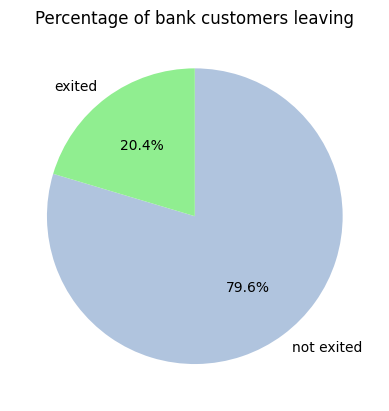

In [4]:
exited_sort_counts = data['exited'].value_counts()
colors = ['lightsteelblue', 'lightgreen']
plt.pie(exited_sort_counts, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = colors, startangle = 90, counterclock = False)
plt.title('Percentage of bank customers leaving')

# labels = ['not exited', 'exited'] , labels = exited_sort_counts.index >> 0,1

#### Summary 1: 
#### about 80% of bank customers choose to stay, and only 20% of customers choose to leave

### 2. Does the geography has any impact of leaving the bank?

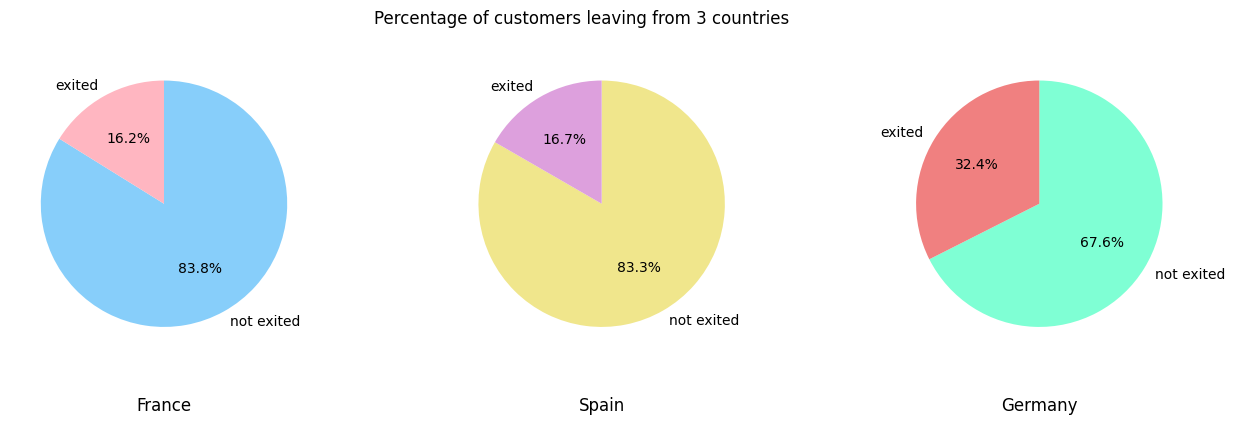

In [5]:
fig,ax = plt.subplots(1,3, figsize=(16,4));

fr_count = data[data['geography'] == 'France']['exited'].value_counts()
es_count = data[data['geography'] == 'Spain']['exited'].value_counts()
ger_count = data[data['geography'] == 'Germany']['exited'].value_counts()
ax[0].pie(fr_count, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['lightskyblue', 'lightpink'], startangle = 90, counterclock = False)
ax[0].set_title("France", y= -0.2)
ax[1].pie(es_count, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['khaki', 'plum'], startangle = 90, counterclock = False)
ax[1].set_title("Spain", y= -0.2)
ax[2].pie(ger_count, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['aquamarine', 'lightcoral'], startangle = 90, counterclock = False)
ax[2].set_title("Germany", y= -0.2)
fig.suptitle('Percentage of customers leaving from 3 countries');

#### Summary 2:
#### by comparing bank customers from the three countries, it can be found that customers from Germany are more likely to leave, with a ratio of nearly 1/3, which is twice that of Spain or France.

### 3. Does the gender has any impact of leaving the bank?

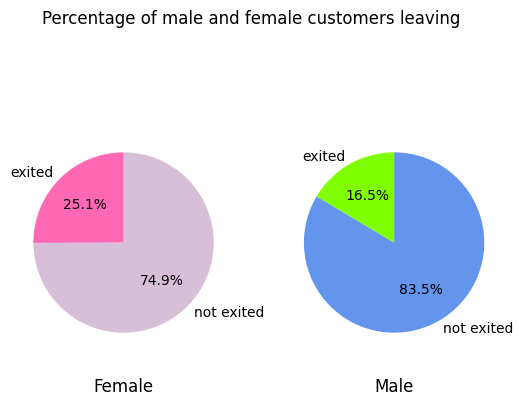

In [6]:
fig,ax = plt.subplots(1,2)

female_count = data[data['gender'] == 'Female']['exited'].value_counts()
male_count = data[data['gender'] == 'Male']['exited'].value_counts()
ax[0].pie(female_count, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['thistle', 'hotpink'], startangle = 90, counterclock = False)
ax[0].set_title("Female", y= -0.2)
ax[1].pie(male_count, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['cornflowerblue', 'chartreuse'], startangle = 90, counterclock = False)
ax[1].set_title("Male", y= -0.2)

fig.suptitle('Percentage of male and female customers leaving');

#### Summary 3:
#### more than 25% of female customers choose to leave, while only 16.5% of men. So women are relatively more likely to leave.

### 4. Does the age has any impact of leaving the bank?

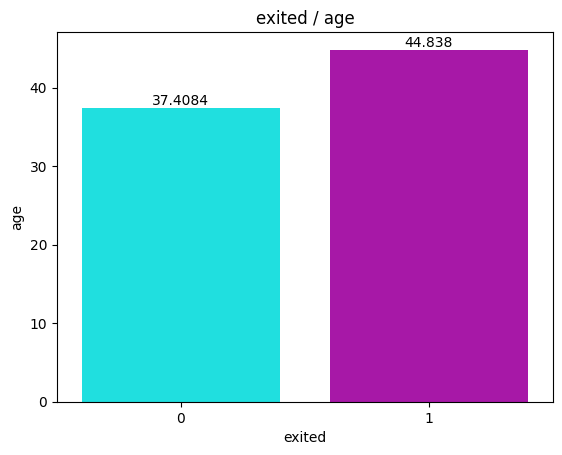

In [8]:
df_exit = data.groupby("exited").agg({"age":"mean"}).reset_index()
sx = sns.barplot(data=df_exit, y='age', x='exited')
colors = ["cyan", "m"]
sns.set_palette(sns.color_palette(colors))
sx.set(title="exited / age")

for i in sx.containers:
    sx.bar_label(i,)

#### Summary 4:
#### The average age of customers who stayed was 37, while those who left were 45. The gap is not small, so customers who are older are more likely to leave.

### 5. Does the tenure has any impact of leaving the bank?

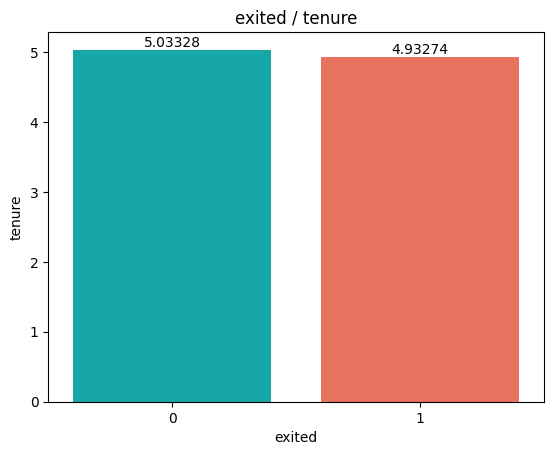

In [10]:
df_exit = data.groupby("exited").agg({"tenure":"mean"}).reset_index()
sx = sns.barplot(data=df_exit, y='tenure', x='exited')
sx.set(title="exited / tenure")
colors = ["c", "tomato"]
sns.set_palette(sns.color_palette(colors))

for i in sx.containers:
    sx.bar_label(i,)
    

#### Summary 5:
#### The average tenure of both customers who stay and customers who leave is close to 5 years. So tenure has no effect on customer departure.

### 6. Does the balance has any impact of leaving the bank?

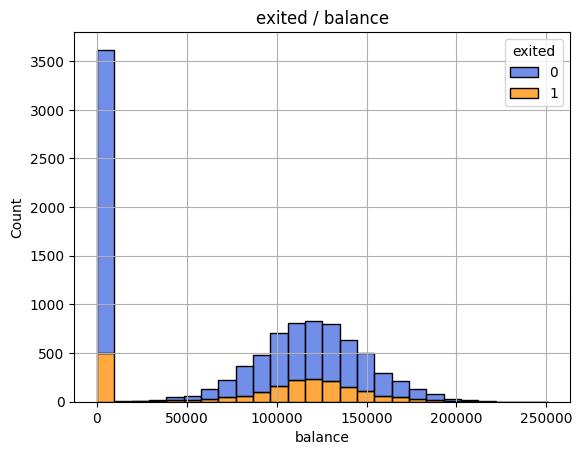

In [12]:
sx = sns.histplot(data=data, x="balance", hue="exited", bins=26, multiple='stack')  # 调整分箱个数，设置bins参数
sx.grid()
sx.set(title="exited / balance")
colors = ["royalblue", "darkorange"]
sns.set_palette(sns.color_palette(colors))

#### Summary 6:
#### First of all, we can see that the vast majority of customers choose to stay, and many bank customers have no balance in their accounts.
#### As the balance increases, the ratio of customers who stay to customers who leave does not change significantly

#### So the balance has basically no effect on the customer leaving

### 7. Does the number of products has any impact of leaving the bank?

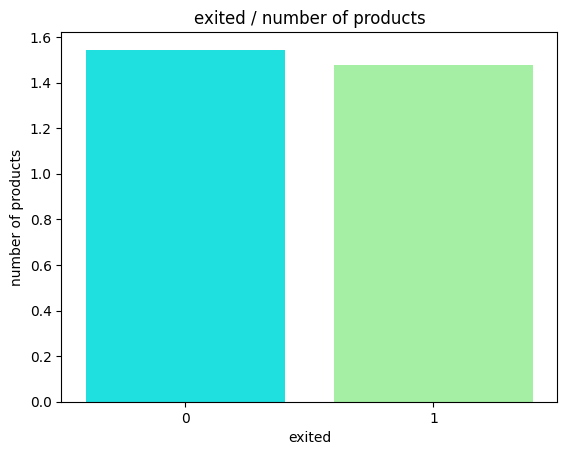

In [14]:
df_exit = data.groupby("exited").agg({"num_of_products":"mean"}).reset_index()
sx = sns.barplot(data=df_exit, y='num_of_products', x='exited')
sx.set(ylabel="number of products", title="exited / number of products")
colors = ["aqua", "palegreen"]
sns.set_palette(sns.color_palette(colors))

#### Summary 7:
#### customers who stay have an average number of products close to 1.5, as do customers who leave.
#### So the number of products has basically no effect on the customer leaving

### 8. Does having a credit card affect leaving the bank?

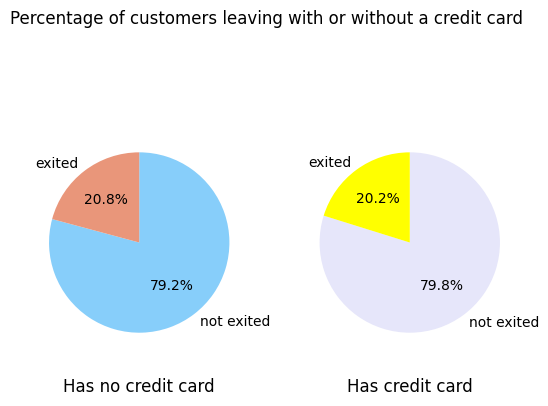

In [21]:
fig,ax = plt.subplots(1,2)

no_cd_count = data[data['has_cr_card'] == 0]['exited'].value_counts()
cd_count = data[data['has_cr_card'] == 1]['exited'].value_counts()
ax[0].pie(no_cd_count, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['lightskyblue', 'darksalmon'], startangle = 90, counterclock = False)
ax[0].set_title("Has no credit card", y= -0.2)
ax[1].pie(cd_count, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['lavender', 'yellow'], startangle = 90, counterclock = False)
ax[1].set_title("Has credit card", y= -0.2)

fig.suptitle('Percentage of customers leaving with or without a credit card');

#### Summary 8:
#### Nearly 20% of customers with credit cards choose to leave, as do customers without credit cards. 
#### So the credit card has no effect on the customer leaving.

### 9. Does being an active member affect leaving the bank?

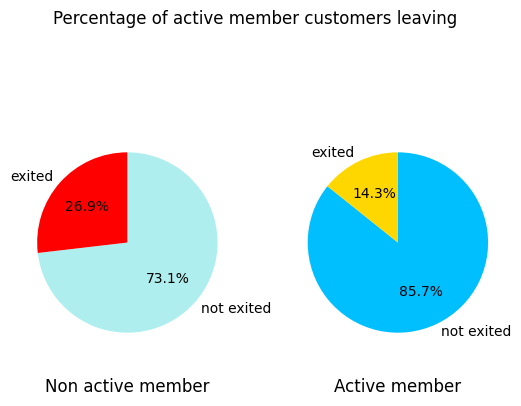

In [24]:
fig,ax = plt.subplots(1,2)

no_active_member_count = data[data['is_active_member'] == 0]['exited'].value_counts()
active_member = data[data['is_active_member'] == 1]['exited'].value_counts()
ax[0].pie(no_active_member_count, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['paleturquoise', 'red'], startangle = 90, counterclock = False)
ax[0].set_title("Non active member", y= -0.2)
ax[1].pie(active_member, labels = ['not exited', 'exited'], autopct = '%.1f%%', 
        colors = ['deepskyblue', 'gold'], startangle = 90, counterclock = False)
ax[1].set_title("Active member", y= -0.2)

fig.suptitle('Percentage of active member customers leaving');

#### Summary 9:
#### Among non-active members, 27% of customers choose to leave, compared to only 14% of active members.
#### So active member customers are more likely to stay.

### 10. Does the salary has any impact of leaving the bank?

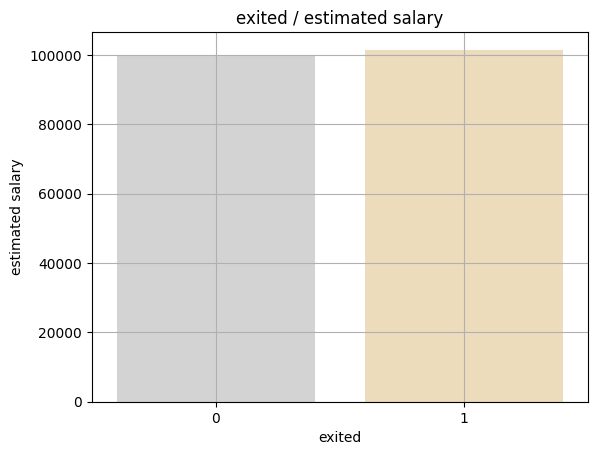

In [20]:
df_exit = data.groupby("exited").agg({"estimated_salary":"mean"}).reset_index()
sx = sns.barplot(data=df_exit, y='estimated_salary', x='exited')
colors = ["lightgray", "wheat"]
sns.set_palette(sns.color_palette(colors))
sx.set(ylabel="estimated salary", title="exited / estimated salary")
sx.grid()

#### Summary 10:
#### The average estimated salary of clients who left was close to 100,000, as did those who stayed. 
#### So estimated salary has no effect on customer leaving.